# ANU - TP5 Optimisation

B. Boutin, Y. Le Hénaff et M. Bouchereau

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## I - Gradient à pas fixe

Cette première partie propose d'implémenter la méthode du gradient à pas fixe afin de résoudre des systèmes linéaires de la forme

\begin{equation}
    Ax=b,
\end{equation}

où $A\in\mathcal{M}_d(\mathbb{R})$ est une matrice symétrique, via l'optimisation de fonctionnelle quadratique suivante:

\begin{equation}
    J(x) = \frac12\langle Ax | x \rangle - \langle b | x \rangle.
\end{equation}

On utilise pour cela la méthode du gradient à pas fixe:

\begin{equation}
    x_{k+1} = x_k - \rho\nabla J(x_k)
\end{equation}

### 1 - Etude générale

On se propose d'implémenter la méthode du gradient à pas fixe afin de résoudre un tel système.



**Q1 -** Ecrire une fonction permettant de résoudre un système linéaire de cette forme via le gradient à pas fixe. On veillera à ce que la méthode s'arrête lorsque le nombre d'itérations ne dépasse pas un seuil maximal et/ou lorsque que la suite $(\nabla J(x_k))_{k\in\mathbb{N}} = (Ax_k-b)_{k\in\mathbb{N}}$ ne varie presque plus. Cette fonction devra retourner les itérations $x_0,x_1,\cdots,x_N$ et la solution approchée $x_N$ où $N$ est le nombre d'itérations.

Tester cette fonction dans le cas suivant:

$$A = \begin{bmatrix}
        1 & 0 \\
        0 & \frac{1}{20}
        \end{bmatrix} , \hspace{10mm} b = \begin{bmatrix}
                                            1 \\
                                            \frac{1}{10} 
                                           \end{bmatrix}$$
                                           
en prenant $\rho = 1$, $\verb|Max_iter| = 1000$ et $\verb|tol| = 10^{-8}$. Représenter l'erreur $\|Ax_k-b\|$ en échelle logarithmique ($\log\|Ax_k-b\|$ en fonction de $k$, les itérations). Procéder de même en prenant $\rho = 0.5$ et $\rho = 1.5$.

Solution - rho = 0.5: [1.        1.9999998]
Solution - rho = 1.0: [1.         1.99999981]
Solution - rho = 1.5: [1.         1.99999981]


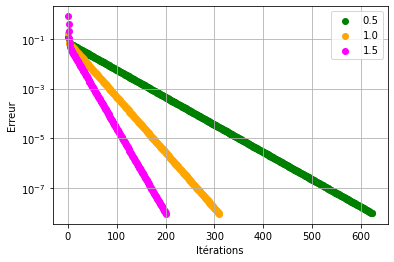

In [2]:
def grad_pas_fixe_syst_lin(A , b , rho = 1 , Max_iter = 1000 , tol = 1e-8):
    """Réalise la méthode du gradient à pas fixe pour résoudre un système linéaire de la forme Ax = b, où A est une matrice *symétrique*
    Entrées:
    - A: Array de taille (d,d), symétrique
    - b: Array de taille (d,)
    - rho: Flottant - Pas de la méthode du gradient à pas fixe. Defaut: 1
    - Max_iter: Int - Nomnbre maximal d'itérations et critère d'arrêt. Defaut: 1000
    - tol: Tolérance, variation du gradient maximale et critère d'arrêt. Defaut: 1e-8"""
    
    d = A.shape[0] # Dimension du problème
    
    x_k = np.random.uniform(size=(d,))
    k = 0
    
    X = [x_k] # Historique des itérations x_0,x_1,...
    
    while (k < Max_iter) and (np.linalg.norm(A@x_k-b) > tol):
        k+=1
        #print(k,np.linalg.norm(A@x_k - b))
        x_k = x_k - rho*(A@x_k-b)
        X.append(x_k)
    
    if (np.linalg.norm(A@x_k - b) > tol):
        raise RuntimeError(f"La méthode n'a pas convergé après {Max_iter} itérations.")
    else:
        return X,x_k
    
A = np.array([[1,0],[0,1/20]])
b = np.array([1,1/10])

X_1 , sol_1 = grad_pas_fixe_syst_lin(A , b , rho = 0.5 , Max_iter = 1000 , tol = 1e-8)
X_2 , sol_2 = grad_pas_fixe_syst_lin(A , b , rho = 1.0 , Max_iter = 1000 , tol = 1e-8)
X_3 , sol_3 = grad_pas_fixe_syst_lin(A , b , rho = 1.5 , Max_iter = 1000 , tol = 1e-8)

print("Solution - rho = 0.5:" , sol_1)
print("Solution - rho = 1.0:" , sol_2)
print("Solution - rho = 1.5:" , sol_3)

Err_1 = np.array([np.linalg.norm(A@x-b) for x in X_1])
Err_2 = np.array([np.linalg.norm(A@x-b) for x in X_2])
Err_3 = np.array([np.linalg.norm(A@x-b) for x in X_3])


plt.figure()
plt.scatter(np.arange(0,np.size(Err_1),1),Err_1,label="0.5",color="green")
plt.scatter(np.arange(0,np.size(Err_2),1),Err_2,label="1.0",color="orange")
plt.scatter(np.arange(0,np.size(Err_3),1),Err_3,label="1.5",color="magenta")
plt.grid()
plt.xlabel("Itérations")
plt.ylabel("Erreur")
plt.yscale("log")
plt.legend()
plt.show()



### 2 - Application: Laplacien discret 1D

On se propose d'utiliser cette méthode du gradient à pas fixe résolvant un système linéaire afin de résoudre de manière approchée le problème aux limites suivant:

$$-u''(x) = f(x) , \hspace{4mm} x \in [0,1], \hspace{4mm} u(0) = u(1) = 0.$$

Pour cela, on discrétise l'intervalle $[0,1]$ en $(x_j)_{0 \leqslant j \leqslant J}$ tels que, pour tout $0 \leqslant j \leqslant J$, $x_j=\frac{j}{J}$ ($x_0=0$, $x_1 = \frac{1}{J}$,..., $x_J=1$). On note $u_j$ la solution approchée de $u$ au point $x_j$: $u_j \approx u(x_j)$. On résout donc le système:

$$J^2\begin{bmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & -1 & 2 & -1 \\
0 & \cdots & 0 & -1 & 2
\end{bmatrix} \begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
\vdots \\
u_{J-1}
\end{bmatrix} = \begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
\vdots \\
f(x_{J-1})
\end{bmatrix},$$

et, par hypothèse, on a automatiquement $u_0 = u_J = 0$.

**Q2-** Résoudre cette équation à l'aide de la méthode du gradient à pas fixe. On prendra $f(x) = \pi^2\sin(\pi x)$, $J=100$, $\rho = 10^{-5}$, $\verb|Max_iter| = 10^6$ ,$\verb|tol| = 10^{-5}$. Tracer la solution exacte, donnée par $u_{ex}(x) = \sin(\pi x)$. 

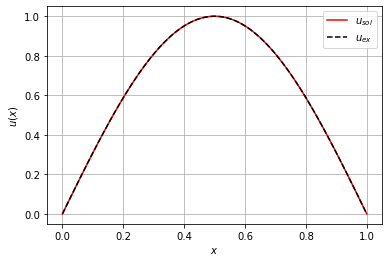

In [3]:
J = 100

def f(x):
    """Fonction de l'exemple.
    Entrée:
    - x: Flottant."""
    return np.pi**2*np.sin(np.pi*x)

A = 2*np.diag(np.ones(J-1),0) - np.diag(np.ones(J-2),-1) - np.diag(np.ones(J-2),1)
A = (J)**2*A
b = np.array([f(j/J) for j in range(1,J)])

U, sol = grad_pas_fixe_syst_lin(A , b , rho = 1e-5 , Max_iter = 10**6 , tol = 1e-5)

u_sol = np.concatenate((np.array([0.0]),sol,np.array([0.0])),axis=0)
u_ex = np.array([np.sin(np.pi*j/J) for j in range(0,J+1)])

plt.figure()
plt.plot(np.array([j/J for j in range(0,J+1)]),u_sol , color = "red" , label = "$u_{sol}$")
plt.plot(np.array([j/J for j in range(0,J+1)]),u_ex , color = "black" , linestyle = "dashed" , label = "$u_{ex}$")
plt.ylabel("$u(x)$")
plt.xlabel("$x$")
plt.legend()
plt.grid()
plt.show()

## II - Régression & moindres carrés

On peut appliquer l'optimisation afin de résoudre des problèmes aux moindres carrés. ce procédé peut en particulier être utilisé afin d'étudier un problème de régression.

### 1 - Régression polynomiale

Connaissant une suite de points $(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)$, on cherche à lier les $x_i$'s et les $y_i$'s par une relation polynomiale, autrement dit, s'il existe des réels $a_0,\cdots,a_d$ tels que, pour tout $1 \leqslant i \leqslant n$:

$$y_i = a_0 + a_1x_i + \cdots + a_dx_i^d.$$

Cela conduit donc à un système de la forme:

$$\underbrace{\begin{bmatrix}
1 & x_1 & \cdots & x_1^d \\
1 & x_2 & \cdots & x_2^d \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_n & \cdots & x_n^d
\end{bmatrix}}_{:=X\in\mathcal{M}_{n,d+1}(\mathbb{R})} \cdot \underbrace{\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_d
\end{bmatrix}}_{:=\alpha\in\mathbb{R}^{d+1}} = \underbrace{\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix},}_{:=Y\in\mathbb{R}^{n}}$$

soit alors $X\alpha = Y$. Lorsque $d \gg n$ (ce qui est en général vrai puisque nous avons beaucoup de données à traiter), un tel système n'admet en général pas de solution, on dit qu'il est surdéterminé. On recherche donc $\alpha \in \mathbb{R}^{d+1}$ minimisant la quantité:

$$E(\alpha) = \|X\alpha-Y\|^2.$$

On montre facilement que:

$$\nabla E(\alpha) = 2(X^TX\alpha - X^TY).$$

on peut donc trouver le $\alpha$ optimal via la suite:

$$\alpha_{k+1} = \alpha_k - \rho\nabla E(\alpha_k).$$

**Q3 -** En s'inspirant de la fonction créée en question **Q1**, créer une fonction prenant en entrée des listes de données $(x_i)_{1 \leqslant i \leqslant n}$ et $(y_i)_{1 \leqslant i \leqslant n}$ et réalisant une régression polynomiale entre ces données. pour construire la matrice $X$, on pourra utiliser la fonction $\verb|np.concatenate|$. Tester sur les séries de données suivantes dans le cas $d=1$:

In [4]:
x = np.array([0.0 , 1.0 , 2.0 , 3.0 , 4.0])
y = np.array([-2.0 , -1.0 , 0.0 , 1.0 , 2.0])

On prendra $\rho = 10^{-2}$, $\verb|Max_iter| = 1000$ ,$\verb|tol| = 10^{-8}$.

Solution: y = 0.9999999988973359 x + -1.999999996856546


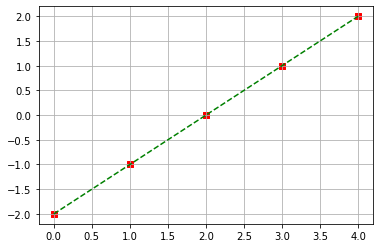

In [5]:
def grad_pas_fixe_reg_pol(x , y , d , rho = 1 , Max_iter = 1000 , tol = 1e-8):
    """Réalise la méthode du gradient à pas fixe pour faire une régression polynomiale
    Entrées:
    - x: Array de taille (n,), abscisses
    - y: Array de taille (d,), ordonnées
    - d: Int - Degré de la régression polynomiale
    - rho: Flottant - Pas de la méthode du gradient à pas fixe. Defaut: 1
    - Max_iter: Int - Nomnbre maximal d'itérations et critère d'arrêt. Defaut: 1000
    - tol: Tolérance, variation du gradient maximale et critère d'arrêt. Defaut: 1e-8"""
    
    n = np.size(x)
    xx = x.copy()
    xx = xx.reshape(n,1)
    
    X = np.ones_like(xx)
    
    for i in range(1,d+1):
        X = np.concatenate((X,xx**i),axis=1)
    
    alpha_k = np.random.uniform(size=(d+1,))
    k = 0
    
    ALPHA = [alpha_k] # Historique des itérations alpha_0,alpha_1,...
    
    while (k < Max_iter) and (np.linalg.norm(2*(X.T@(X@alpha_k-y))) > tol):
        k+=1
        #print(k,np.linalg.norm(2*(X.T@(X@alpha_k-y))))
        alpha_k = alpha_k - rho*2*(X.T@X@alpha_k-X.T@y)
        ALPHA.append(alpha_k)
    
    if (np.linalg.norm(2*(X.T@X@alpha_k-X.T@y)) > tol):
        raise RuntimeError(f"La méthode n'a pas convergé après {Max_iter} itérations.")
    else:
        return ALPHA,alpha_k
    
    
ALPHA , alpha = grad_pas_fixe_reg_pol(x , y , d = 1 , rho = 1e-2 , Max_iter = 1000 , tol = 1e-8)
print("Solution: y =" , alpha[1] , "x +" , alpha[0])

plt.figure()
plt.scatter(x,y,marker="s",color="red")
plt.plot(x,y,color="green",linestyle="dashed")
plt.grid()
plt.show()

### 2 - La loi d'Ohm

La loi d'Ohm permet de faire le lien entre la tension aux bornes d'une resistance et l'intensité la traversant. Si on note $R$ la valeur de la résistance, $U$ la tension aux bornes de la résistance et $I$ l'intensité la traversant, alors on a:

$$ U = R \times I$$.

On mesure les tensions et intensités suivantes (repectivement en Volts et Ampères):

In [6]:
U = np.array([0.085 , 0.187 , 0.4 , 0.52 , 0.71 , 0.785 , 1.02])
I = np.array([0.012 , 0.021 , 0.045 , 0.049 , 0.067 , 0.08 , 0.11])

**Q4 -** Déterminer la valeur de la resistance $R$ par régérssion linéaire. Tracer $U$ en fonction de $I$ sur un graphe, ainsi que la droite obtenue par régression linéaire. On prendra $\rho = 10^{-1}$, $\verb|Max_iter| = 10^5$ ,$\verb|tol| = 10^{-8}$. On comparera les résultats avec la méthode $\verb|np.polyfit|$.

- Méthode programmée:
 > Solution: U = 9.75385145422322 I + -0.0054969940211336416
 > R =  9.75385145422322  Omhs
 
-  Méthode np.polyfit:
 > Solution: U = 9.753852175346076 I + -0.005497033618984676
 > R =  9.753852175346076  Omhs


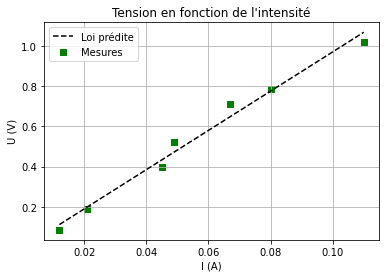

In [7]:
# Méthode programmée

ALPHA , alpha = grad_pas_fixe_reg_pol(I , U , d = 1 , rho = 0.1 , Max_iter = 10**5 , tol = 1e-8)
print("- Méthode programmée:")
print(" > Solution: U =" , alpha[1] , "I +" , alpha[0])
print(" > R = ",alpha[1]," Omhs")
print(" ")


# Méthode np.polyfit

alpha_bis =np.polyfit(I , U , 1)
print("-  Méthode np.polyfit:")
print(" > Solution: U =" , alpha_bis[0] , "I +" , alpha_bis[1])
print(" > R = ",alpha_bis[0]," Omhs")

plt.figure()
plt.scatter(I , U , color = "green" , marker = "s" , label = "Mesures")
plt.plot(I , alpha[0]+alpha[1]*I , color = "black" , linestyle = "dashed" , label="Loi prédite")
plt.xlabel("I (A)")
plt.ylabel("U (V)")
plt.legend()
plt.title("Tension en fonction de l'intensité")
plt.grid()
plt.show()

### 3 - Trajectoire d'un ballon

Un ballon, lancé depuis une hauteur $y_0$ avec une vitesse initiale $v_0$ et selon un angle $\theta$, et soumis uniquement à la force de pesanteur (on ne prend pas en compte les effets dûs aux frottements de l'air), décrit une trajectoire parabolique dont l'expression de l'altitude $y(t)$ au cours du temps est décrite par l'expression suivante:

$$y(t) = -\frac12 gt^2 + v_0\sin(\theta)t + y_0,$$

où $g = 9.81 m.s^{-2}$ est l'accélération de la pensanteur. On fait les relevés d'altitude suivants au cours du temps, toutes les 100 millisecondes:

In [8]:
t = np.array([0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0])
#y = -0.5*9.81*t**2 + 5*np.sin(np.pi/4)*t + 1.8 + 0.05*np.random.uniform(size=(11,))
#print(y)
y = np.array([1.84 , 2.15 , 2.31 , 2.45 , 2.48 , 2.36 , 2.19 , 1.92 , 1.49 , 1.05 , 0.44])

**Q5 -** En utilisant la fonction créée en question **Q3**, trouver l'équation de la trajectoire en fonction du temps (on se placera ainsi dans le cas $d=2$). On prendra $\rho = 10^{-2}$, $\verb|Max_iter| = 10^5$ ,$\verb|tol| = 10^{-8}$. En supposant que le ballon a été lancé avec un angle $\theta = 45°$, quelle est la vitesse initiale du ballon ? Représenter $t$ et $y$ sur un graphe, ainsi que la parabole obtenuer par régression polynomiale. Comparer les résultats obtenus en utilisant la fonction $\verb|np.polyfit|$

- Méthode programmée:
Trajectoire: y(t) =  -4.924242341444443 t^2 +  3.5415150651934546 t +  1.8327272869625104
Vitesse initiale: v_0 =  5.00845863654522 m/s
Accélération de la pesanteur calculée: g =  9.848484682888886 m/s**2
 
- Méthode np.polyfit:
Trajectoire: y(t) =  -4.92424242424243 t^2 +  3.5415151515151573 t +  1.8327272727272725
Vitesse initiale: v_0 =  5.008458758622543 m/s
Accélération de la pesanteur calculée: g =  9.84848484848486 m/s**2


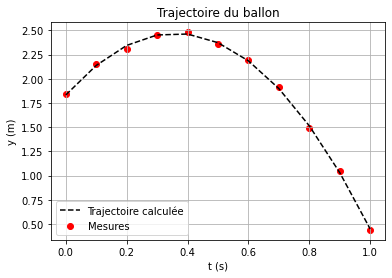

In [9]:
# Utilisation de la méthode programmée

ALPHA , alpha = grad_pas_fixe_reg_pol(t , y , d = 2 , rho = 1e-2 , Max_iter = 10**5 , tol = 1e-8)
print("- Méthode programmée:")
print("Trajectoire: y(t) = " , alpha[2] , "t^2 + " , alpha[1] , "t + " , alpha[0])
print("Vitesse initiale: v_0 = " , alpha[1]/np.sin(np.pi/4) , "m/s")
print("Accélération de la pesanteur calculée: g = " , -2*alpha[2] , "m/s**2")
print(" ")


# Utilisation de la méthode np.polyfit

alpha_bis = np.polyfit(t , y , 2)
print("- Méthode np.polyfit:")
print("Trajectoire: y(t) = " , alpha_bis[0] , "t^2 + " , alpha_bis[1] , "t + " , alpha_bis[2])
print("Vitesse initiale: v_0 = " , alpha_bis[1]/np.sin(np.pi/4) , "m/s")
print("Accélération de la pesanteur calculée: g = " , -2*alpha_bis[0] , "m/s**2")

plt.figure()
plt.scatter(t , y , color = "red" , label = "Mesures")
plt.plot(t , alpha[0] + alpha[1]*t + alpha[2]*t**2 , linestyle = "dashed" , color = "black" , label = "Trajectoire calculée")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.legend()
plt.title("Trajectoire du ballon")
plt.grid()
plt.show()